In [10]:
#导入数据
import h5py

In [11]:
#训练原始数据
train_data = h5py.File('C:/Users/lca/Desktop/datasets/train_catvnoncat.h5','r')
#测试原始数据
test_data = h5py.File('C:/Users/lca/Desktop/datasets/test_catvnoncat.h5','r')

In [12]:
for key in train_data.keys():
    print(key)

list_classes
train_set_x
train_set_y


In [13]:
train_data['train_set_x'].shape

(209, 64, 64, 3)

In [14]:
train_data['train_set_y'].shape

(209,)

In [15]:
for key in test_data.keys():
    print(key)

list_classes
test_set_x
test_set_y


In [16]:
test_data['test_set_x'].shape

(50, 64, 64, 3)

In [17]:
test_data['test_set_y'].shape

(50,)

In [18]:
#取出数据集
train_data_org = train_data['train_set_x'][:]
train_labels_org = train_data['train_set_y'][:]
test_data_org = test_data['test_set_x'][:]
test_labels_org = test_data['test_set_y'][:]

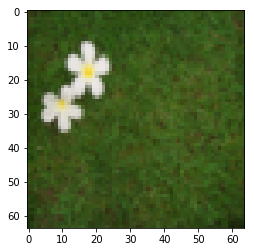

In [19]:
#查看图片
import matplotlib.pyplot as plt
%matplotlib inline
#在线显示图片，不加的话，用plt.show()也是可以的，但麻烦，每次都要用
plt.imshow(train_data_org[6])

In [20]:
#数据维度的处理
m_train = train_data_org.shape[0]
m_test = test_data_org.shape[0]
print(m_train,m_test)

209 50


In [21]:
train_data_tran = train_data_org.reshape(m_train,-1).T
test_data_tran = test_data_org.reshape(m_test,-1).T
print(train_data_tran.shape,test_data_tran.shape)

(12288, 209) (12288, 50)


In [22]:
import numpy as np
train_labels_tran = train_labels_org[np.newaxis,:]
#此处不知为何用转置还是不变，存疑
print(train_labels_tran.shape)
test_labels_tran = test_labels_org[np.newaxis,:]
print(test_labels_tran.shape)
#print(train_labels_tran)

(1, 209)
(1, 50)


In [23]:
#标准化数据到0~1区间内
#因为数据值相差过大在做梯度下降算法时会影响算法的性能
print(test_data_tran)

[[158 115 255 ...  41  18 133]
 [104 110 253 ...  47  18 163]
 [ 83 111 254 ...  84  16  75]
 ...
 [173 171 133 ... 183 144   5]
 [128 176 101 ... 141 137  22]
 [110 186 121 ... 116 108   5]]


In [24]:
train_data_sta = train_data_tran/255
test_data_sta = test_data_tran/255
print(train_data_sta)

[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]


In [25]:
#定义sigmoid函数
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

In [26]:
#初始化参数
n_dim = train_data_sta.shape[0]
print(n_dim)

12288


In [27]:
W = np.zeros((n_dim,1))
b = 0

In [28]:
#定义前向传播函数，代价函数，梯度下降函数
def propagate(W,b,X,Y):
    #1.前向传播函数
    Z = np.dot(W.T,X) + b
    A = sigmoid(Z)
    #2.代价函数
    m = X.shape[1]
    #J是点乘，加dot才是矩阵相乘
    J = -1/m *np.sum(Y*np.log(A) +(1-Y)*np.log(1-A))
    #3.梯度下降
    dW = 1/m*np.dot(X,(A-Y).T)
    db = 1/m*np.sum(A-Y)
    
    grands = {'dW':dW,'db':db}
    return grands,J

In [29]:
#优化部分
def optimise(W,b,X,Y,alpha,n_iters):
    costs = []
    for i in range(n_iters):
        grands,J = propagate(W,b,X,Y)
        dW = grands['dW']
        db = grands['db']
        
        W = W-alpha*dW
        b = b-alpha*db
        
        if i%100 == 0:
            costs.append(J)
            print('n_iters is',i,'cost is',J)
            
    grands = {'dW':dW,'db':db}
    params = {'W':W,'b':b}
    
    return grands,params,costs
            

In [30]:
#预测部分
def predict(W,b,X_test):
    Z = np.dot(W.T,X_test) + b
    A = sigmoid(Z)
    
    m = X_test.shape[1]
    y_pred = np.zeros((1,m))
    
    for i in range(m):
        if A[:,i] >0.5:
            y_pred[:,i]=1
        else:
            y_pred[:,i]=0
    return y_pred

In [31]:
#模型整合
def model(W,b,X_train,Y_train,X_test,Y_test,alpha,n_iters):
    grands,params,costs = optimise(W,b,X_train,Y_train,alpha,n_iters)
    W = params['W']
    b = params['b']
    y_pred_train = predict(W,b,X_train)
    y_pred_test = predict(W,b,X_test)
    
    print('the train acc is',np.mean(y_pred_train== Y_train))
    print('the test acc is',np.mean(y_pred_test== Y_test))
    
    b = {
        'W':W,
        'b':b,
        'costs':costs,
        'y_pred_train':y_pred_train,
        'y_pred_test':y_pred_test,
        'alpha':alpha
    }
    return b

In [32]:
b = model(W,b,train_data_sta,train_labels_tran,test_data_sta ,test_labels_tran,alpha=0.005,n_iters=2000)

n_iters is 0 cost is 0.6931471805599453
n_iters is 100 cost is 0.5845083636993086
n_iters is 200 cost is 0.4669490409465546
n_iters is 300 cost is 0.37600686694802077
n_iters is 400 cost is 0.3314632893282512
n_iters is 500 cost is 0.3032730674743829
n_iters is 600 cost is 0.2798795865826048
n_iters is 700 cost is 0.2600421369258757
n_iters is 800 cost is 0.24294068467796612
n_iters is 900 cost is 0.22800422256726066
n_iters is 1000 cost is 0.21481951378449646
n_iters is 1100 cost is 0.20307819060644994
n_iters is 1200 cost is 0.1925442771670686
n_iters is 1300 cost is 0.18303333796883509
n_iters is 1400 cost is 0.17439859438448874
n_iters is 1500 cost is 0.16652139705400335
n_iters is 1600 cost is 0.1593045182975662
n_iters is 1700 cost is 0.1526673247129651
n_iters is 1800 cost is 0.14654223503982336
n_iters is 1900 cost is 0.14087207570310165
the train acc is 0.9904306220095693
the test acc is 0.7


Text(0, 0.5, 'cost')

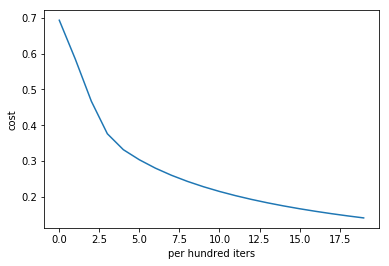

In [33]:
plt.plot(b['costs'])
plt.xlabel('per hundred iters')
plt.ylabel('cost')

In [38]:
index = 34
print('y is',test_labels_tran[0,index])
print('y_prediction is',b['y_pred_test'][0,index])

y is 0
y_prediction is 1.0


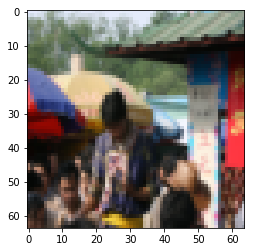

In [39]:
plt.imshow(test_data_org[index])